In [4]:
%pip install pandas
import pandas as pd
import os

# Folder path
data_dir = r'C:\Users\smpat\Documents\7th Sem Project\dataset'

# File names (excluding the large 02-20-2018 file)
file_names = [
    "02-14-2018.csv", "02-15-2018.csv", "02-16-2018.csv", 
    "02-21-2018.csv", "02-22-2018.csv", "02-23-2018.csv", 
    "02-28-2018.csv", "03-01-2018.csv", "03-02-2018.csv"
]

# Load and combine the 9 files
dfs = []
for fname in file_names:
    print(f"Loading {fname}...")
    df = pd.read_csv(os.path.join(data_dir, fname), low_memory=False)
    dfs.append(df)

# Concatenate them all
combined_df = pd.concat(dfs, ignore_index=True)

# Show some info
print("✅ Combined shape:", combined_df.shape)
print("✅ Columns:", list(combined_df.columns))
print("✅ Sample labels:", combined_df['Label'].unique())


Note: you may need to restart the kernel to use updated packages.
Loading 02-14-2018.csv...
Loading 02-15-2018.csv...
Loading 02-16-2018.csv...
Loading 02-21-2018.csv...
Loading 02-22-2018.csv...
Loading 02-23-2018.csv...
Loading 02-28-2018.csv...
Loading 03-01-2018.csv...
Loading 03-02-2018.csv...
✅ Combined shape: (8284254, 80)
✅ Columns: ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',

In [2]:
import pandas as pd

C:\Users\smpat\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Load just first 1000 rows of the big file
big_file = os.path.join(data_dir, "02-20-2018.csv")
sample_df = pd.read_csv(big_file, nrows=1000)

# Compare columns with your existing combined_df
extra_cols = set(sample_df.columns) - set(combined_df.columns)
print("Extra columns in 02-20-2018.csv:", extra_cols)


Extra columns in 02-20-2018.csv: {'Flow ID', 'Src Port', 'Src IP', 'Dst IP'}


In [4]:
import pandas as pd
import os

big_file = r"C:/Users/smpat/Documents/7th Sem Project/dataset/02-20-2018.csv"
cleaned_file = r"C:/Users/smpat/Documents/7th Sem Project/dataset/cleaned_02-20-2018.csv"

# Identify extra columns (replace these with actual ones you found earlier)
extra_cols = ['Flow ID', 'Src Port', 'Src IP', 'Dst IP']  # ← fill real names

chunk_size = 100_000 
is_first = True


for chunk in pd.read_csv(big_file, chunksize=chunk_size, low_memory=False):
    # Drop extra columns safely
    for col in extra_cols:
        if col in chunk.columns:
            chunk.drop(columns=col, inplace=True)

    # Write chunk to cleaned CSV
    chunk.to_csv(cleaned_file, mode='w' if is_first else 'a', index=False, header=is_first)
    is_first = False
    print(f"✔️ Processed & saved chunk: {chunk.shape}")


✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & saved chunk: (100000, 80)
✔️ Processed & s

In [5]:
final_df = pd.concat([
    combined_df,
    pd.read_csv("C:/Users/smpat/Documents/7th Sem Project/dataset/cleaned_02-20-2018.csv", low_memory=False)
], ignore_index=True)

print("✅ Final dataset shape:", final_df.shape)


✅ Final dataset shape: (16233002, 80)


In [9]:
final_df.to_csv("combined_cicids2018.csv", index=False)


In [8]:
print('hello')

hello


In [18]:
import numpy as np

df = pd.read_csv("combined_cicids2018.csv", nrows=50000)

# Show shape, columns, and sample data
print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:10])  # Show first 10 columns
print("Label values:", df['Label'].unique())

Shape: (50000, 80)
Columns: ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min']
Label values: ['Benign' 'FTP-BruteForce']


In [14]:

labels = set()
chunksize = 100_000

for chunk in pd.read_csv("combined_cicids2018.csv", usecols=['Label'], chunksize=chunksize):
    labels.update(chunk['Label'].unique())

print("All unique labels in the dataset:")
print(sorted(labels))


All unique labels in the dataset:
['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'DDoS attacks-LOIC-HTTP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris', 'FTP-BruteForce', 'Infilteration', 'Label', 'SQL Injection', 'SSH-Bruteforce']


In [15]:
# Label mapping dictionary
label_map = {
    'Benign': 'Benign',
    
    'DoS attacks-Hulk': 'DoS',
    'DoS attacks-Slowloris': 'DoS',
    'DoS attacks-GoldenEye': 'DoS',
    'DoS attacks-SlowHTTPTest': 'DoS',

    'DDOS attack-HOIC': 'DDoS',
    'DDOS attack-LOIC-UDP': 'DDoS',
    'DDoS attacks-LOIC-HTTP': 'DDoS',

    'FTP-BruteForce': 'BruteForce',
    'SSH-Bruteforce': 'BruteForce',
    'Brute Force -Web': 'BruteForce',
    'Brute Force -XSS': 'BruteForce',

    'SQL Injection': 'Exploits',
    'Infilteration': 'Exploits',
    'Bot': 'Exploits'
}

# Replace labels in the dataframe
df['Label'] = df['Label'].map(label_map)

# Optional: remove rows with any labels not mapped (shouldn’t happen)
df = df[df['Label'].notna()]

# Check updated labels
print("Label distribution:\n", df['Label'].value_counts())


Label distribution:
 Label
BruteForce    49895
Benign          105
Name: count, dtype: int64


In [82]:
import pandas as pd

label_map = {
    'Benign': 'Benign',
    'DoS attacks-Hulk': 'DoS',
    'DoS attacks-Slowloris': 'DoS',
    'DoS attacks-GoldenEye': 'DoS',
    'DoS attacks-SlowHTTPTest': 'DoS',
    'DDOS attack-HOIC': 'DDoS',
    'DDOS attack-LOIC-UDP': 'DDoS',
    'DDoS attacks-LOIC-HTTP': 'DDoS',
    'FTP-BruteForce': 'BruteForce',
    'SSH-Bruteforce': 'BruteForce',
    'Brute Force -Web': 'BruteForce',
    'Brute Force -XSS': 'BruteForce',
    'SQL Injection': 'Exploits',
    'Infilteration': 'Exploits',
    'Bot': 'Exploits'
}

chunksize = 50000
target_rows = 1000000
collected_rows = 0
filtered_chunks = []

for chunk in pd.read_csv("combined_cicids2018.csv", chunksize=chunksize, low_memory=False):
    chunk['Label'] = chunk['Label'].map(label_map)
    chunk = chunk[chunk['Label'].notna()]  # Drop rows where label was not in the map

    if not chunk.empty:
        filtered_chunks.append(chunk)
        collected_rows += len(chunk)

    if collected_rows >= target_rows:
        break

# Combine all selected rows
reduced_df = pd.concat(filtered_chunks).iloc[:1000000]

# Save to CSV for future use
reduced_df.to_csv("cicids2018_reduced_500k.csv", index=False)

print("✅ Done! Sample shape:", reduced_df.shape)
print("✅ Class distribution:\n", reduced_df['Label'].value_counts())


✅ Done! Sample shape: (1000000, 80)
✅ Class distribution:
 Label
Benign        619051
BruteForce    380949
Name: count, dtype: int64


In [77]:
reduced_df.to_csv("reduced_df_backup.csv", index=False)


In [81]:
print("Shape:", reduced_df.shape)
print("Unique labels:", reduced_df['Label'].unique())
print("Class distribution:\n", reduced_df['Label'].value_counts())
print("Missing values per column:\n", reduced_df.isnull().sum())
    

Shape: (1000000, 79)
Unique labels: [nan]
Class distribution:
 Series([], Name: count, dtype: int64)
Missing values per column:
 Dst Port               0
Protocol               0
Flow Duration          0
Tot Fwd Pkts           0
Tot Bwd Pkts           0
                  ...   
Idle Mean              0
Idle Std               0
Idle Max               0
Idle Min               0
Label            1000000
Length: 79, dtype: int64


In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
reduced_df = pd.read_csv("reduced_df_backup.csv")

# Drop Timestamp column
reduced_df = reduced_df.drop(columns=['Timestamp'])

reduced_df = reduced_df.sample(frac=1, random_state=42)

# Step 1: Map labels to integers (if not already done)
label_mapping = {'Benign': 0, 'BruteForce': 1}
reduced_df['Label'] = reduced_df['Label'].map(label_mapping)

# Step 2: Split features and target
X = reduced_df.drop(columns=['Label'])
y = reduced_df['Label']

# Step 2: Encode 'Benign' → 0, 'BruteForce' → 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)


In [84]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train label distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")

Train shape: (800000, 78), Test shape: (200000, 78)
Train label distribution: {0: 495241, 1: 304759}


In [22]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 262.6 kB/s eta 0:09:32
   ---------------------------------------- 0.1/150.0 MB 363.1 kB/s eta 0:06:53
   ---------------------------------------- 0.2/150.0 MB 871.5 kB/s eta 0:02:52
   ---------------------------------------- 0.7/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 0.9/150

In [5]:
import numpy as np
# Check how many inf or -inf are in the data
print(np.isinf(X_train).sum().sum(), "inf values in X_train")
print(np.isinf(X_test).sum().sum(), "inf values in X_test")

4029 inf values in X_train
1012 inf values in X_test


In [6]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)


In [7]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create and train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\smpat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:32:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.999995
Confusion Matrix:
 [[123809      1]
 [     0  76190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    123810
           1       1.00      1.00      1.00     76190

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [1]:
from sklearn.metrics import classification_report

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate
print("🔧 Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("🧪 Test Classification Report:\n", classification_report(y_test, y_test_pred))


NameError: name 'model' is not defined

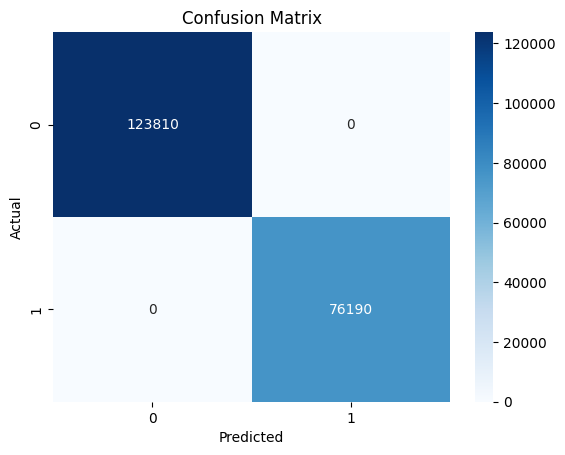

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


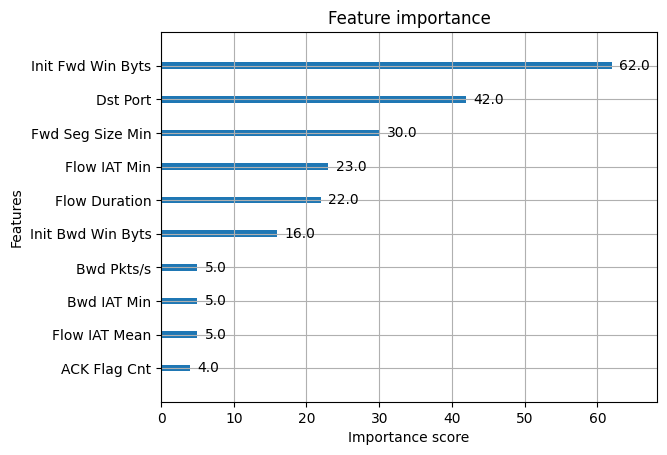

In [89]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=10)
plt.show()


In [93]:
!pip install shap --user

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/aa/7c/eead607a358b2466b95b302e4a7eae717eeed53615653fbbd4c1527041b9/shap-0.48.0-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.48.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
Using cached shap-0.48.0-cp311-cp311-win_amd64.whl (544 kB)


In [98]:
!pip uninstall numpy -y
!pip uninstall numba -y
!pip uninstall shap -y


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: numba 0.61.0
Uninstalling numba-0.61.0:
  Successfully uninstalled numba-0.61.0
Found existing installation: shap 0.48.0
Uninstalling shap-0.48.0:
  Successfully uninstalled shap-0.48.0


In [100]:
!pip install numpy==1.26
!pip install numba
!pip install shap


  Obtaining dependency information for numpy==1.26 from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.1 kB 131.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.1 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 270.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 5.5 MB/s eta 0:00:03
   - -------------------------------------- 0.7/15.8 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/15.8 MB 6.7 MB/s eta 0:00:03
   -- ------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.0 which is incompatible.
mediapipe 0.10.7 requires protobuf<4,>=3.11, but you have protobuf 4.25.6 which is incompatible.
numba 0.57.1 requires llvmlite<0.41,>=0.40.0dev0, but you have llvmlite 0.44.0 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.0 which is incompatible.


  Obtaining dependency information for llvmlite<0.41,>=0.40.0dev0 from https://files.pythonhosted.org/packages/09/7a/3e0bec597ca9e3382ba87c139813ea0b05068d6d5358e05f4557a8c24d63/llvmlite-0.40.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy<1.25,>=1.21 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB 435.7 kB/s eta 0:01:04
   ---------------------------------------- 0.2/27.7 MB 1.6 MB/s eta 0:00:18
    --------------------------------------- 0.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
mediapipe 0.10.7 requires protobuf<4,>=3.11, but you have protobuf 4.25.6 which is incompatible.


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/aa/7c/eead607a358b2466b95b302e4a7eae717eeed53615653fbbd4c1527041b9/shap-0.48.0-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.48.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
Using cached shap-0.48.0-cp311-cp311-win_amd64.whl (544 kB)


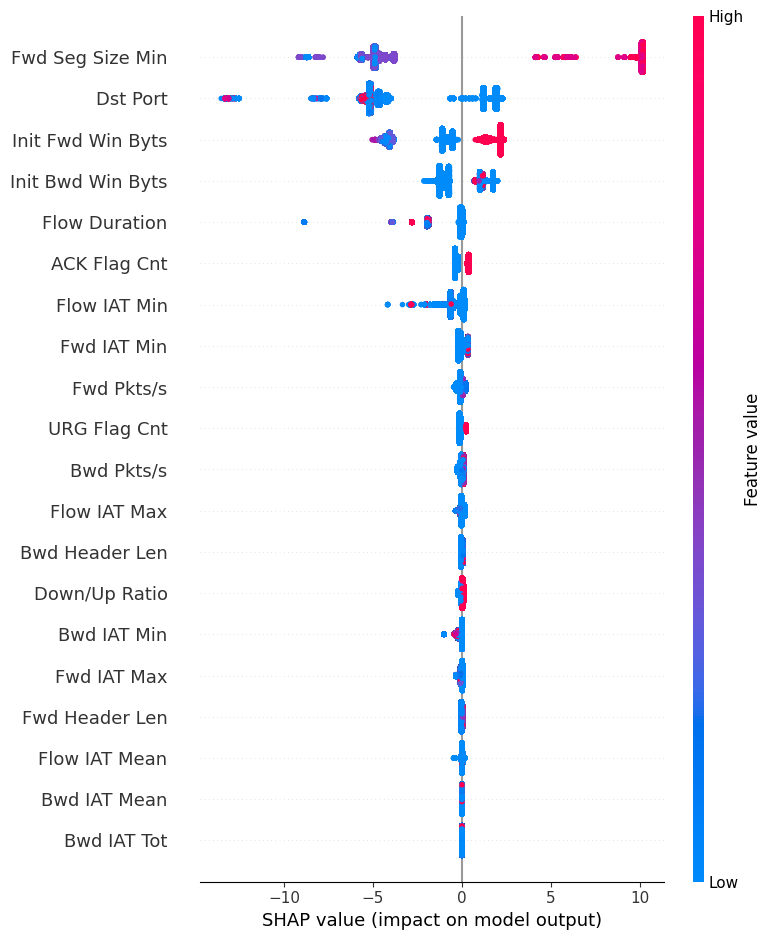

In [101]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [103]:
import xgboost as xgb


# Train model
model = xgb.XGBClassifier(enable_categorical=False, use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

C:\Users\smpat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:10:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [104]:
# Use TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(model)

# Compute SHAP values on a sample (to reduce computation time)
shap_values = explainer.shap_values(X_test.sample(1000, random_state=42))  # You can increase the sample later


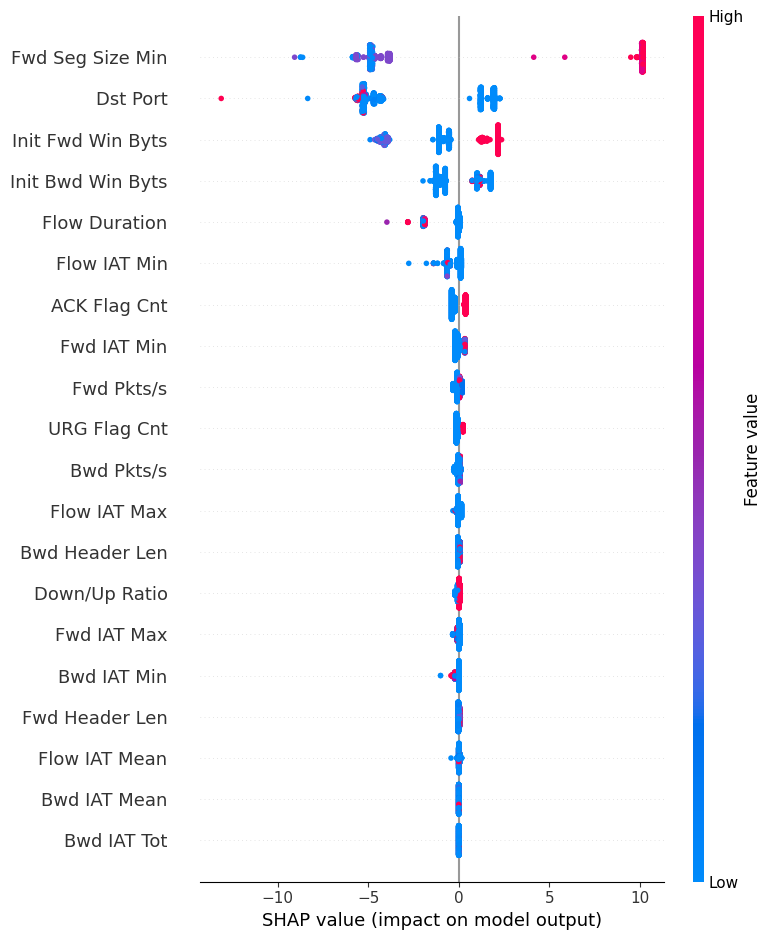

In [105]:
# Summary plot: shows global feature importance
shap.summary_plot(shap_values, X_test.sample(1000, random_state=42))


In [106]:
# Use a single row
sample_idx = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_idx], X_test.iloc[sample_idx])


In [13]:
import joblib
joblib.dump(model, "xgboost_model.pkl")


['xgboost_model.pkl']

In [9]:
print(f"Number of features: {X.shape[1]}")


Number of features: 78


In [10]:
print("Feature names:")
print(X.columns.tolist())


Feature names:
['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd 

In [11]:
import json

with open("feature_names.json", "w") as f:
    json.dump(X.columns.tolist(), f)
